In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [135]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Comprehensive EDA and Data Preparation (Focus on Song Audio Features)

Data Loading and Initial Inspection

In [136]:
df = pd.read_csv("/content/drive/MyDrive/songs.csv")
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [137]:
# Dimension of the dataset
print(np.shape(df))

(2000, 18)


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [139]:
df.isnull().sum()

,0
artist,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0


In [140]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Feature Analysis

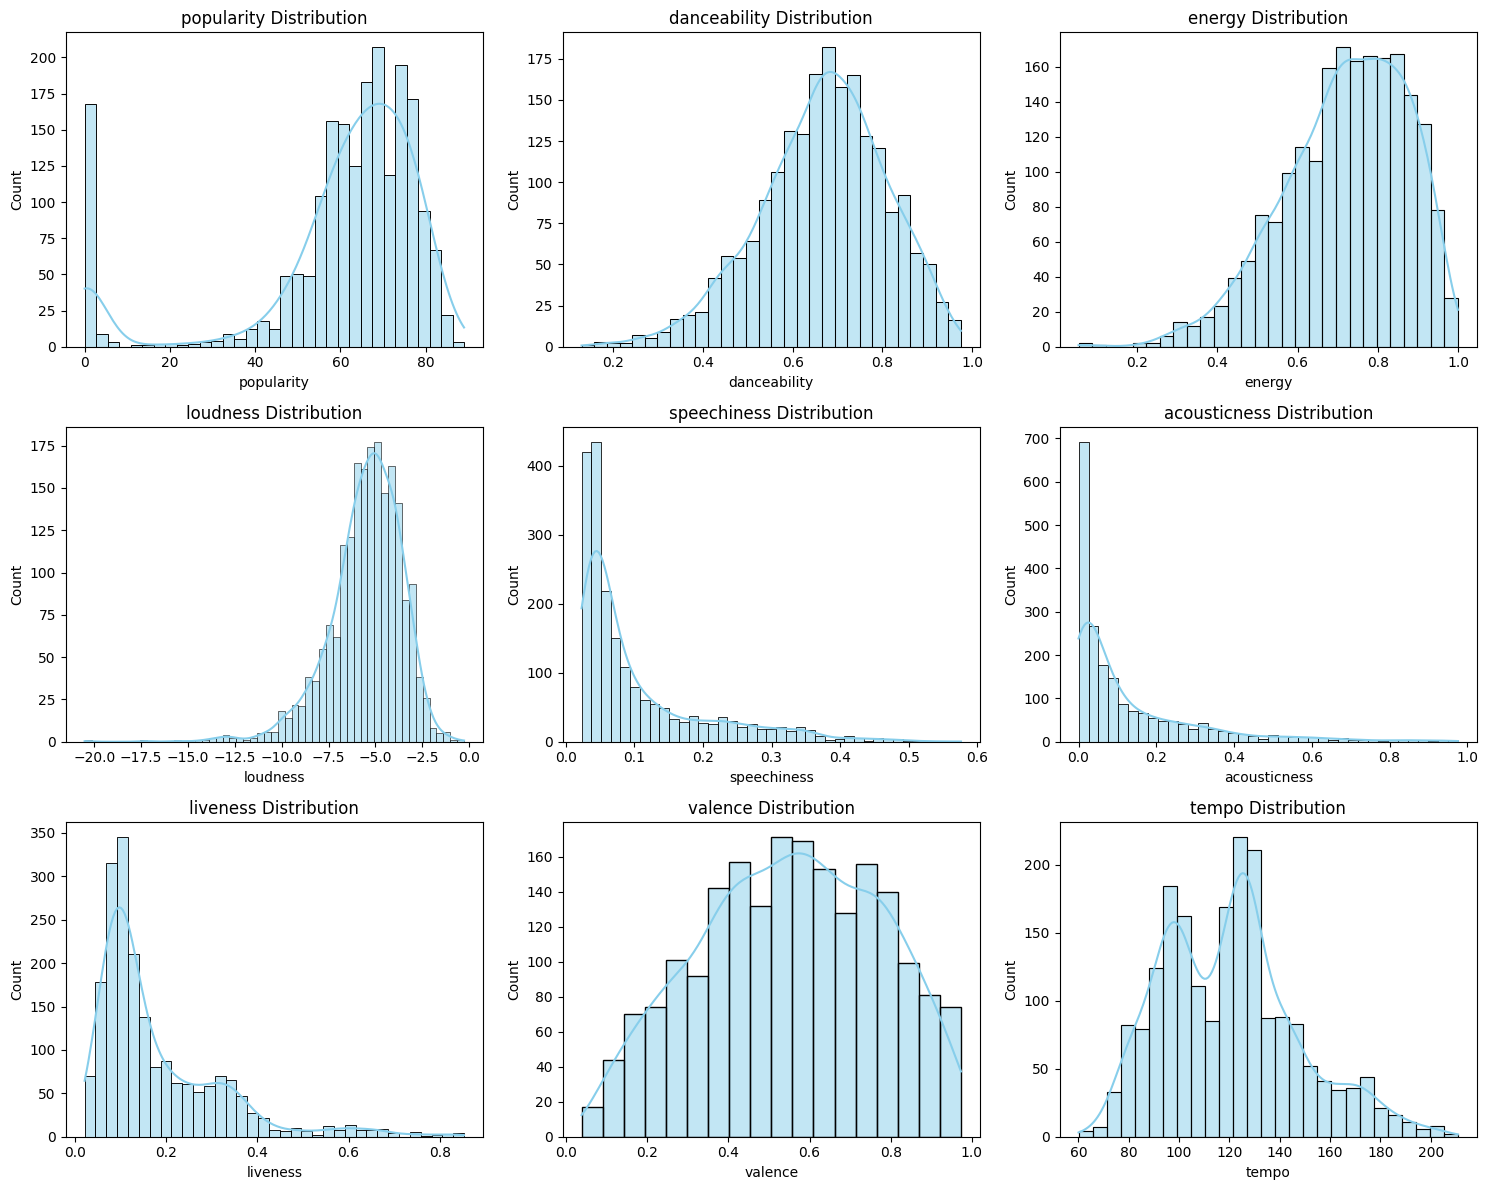

In [141]:
# histplots of numeric feature
numeric_cols = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

# Create subplots
n = len(numeric_cols)
rows = (n // 3) + int(n % 3 != 0)  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))

axes = axes.flatten()  # Flatten in case we have multiple rows

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 target variable analysis

In [142]:
#statistics of the target variable
print("Summary statistics for Popularity:")
print(df['popularity'].describe())


Summary statistics for Popularity:
count    2000.000000
mean       59.872500
std        21.335577
min         0.000000
25%        56.000000
50%        65.500000
75%        73.000000
max        89.000000
Name: popularity, dtype: float64


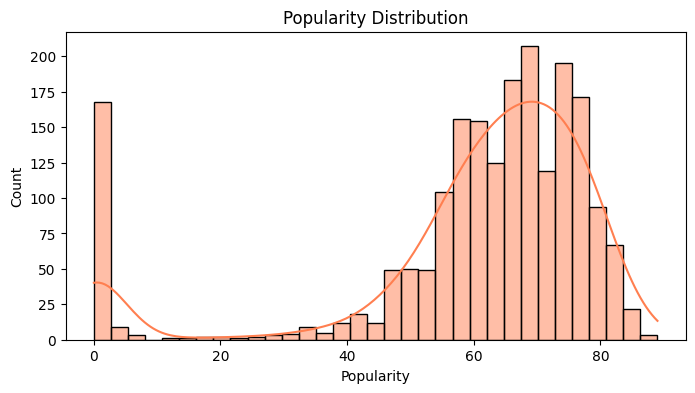

In [143]:
#distribution plot of the target variable
plt.figure(figsize=(8,4))
sns.histplot(df['popularity'], kde=True, color='coral')
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


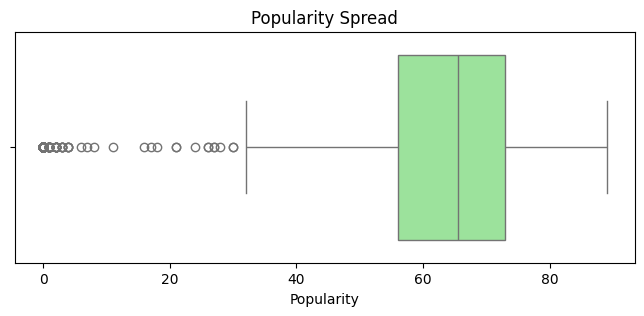

In [144]:
#boxplot to check spread & outliers
plt.figure(figsize=(8,3))
sns.boxplot(x=df['popularity'], color='lightgreen')
plt.title("Popularity Spread")
plt.xlabel("Popularity")
plt.show()

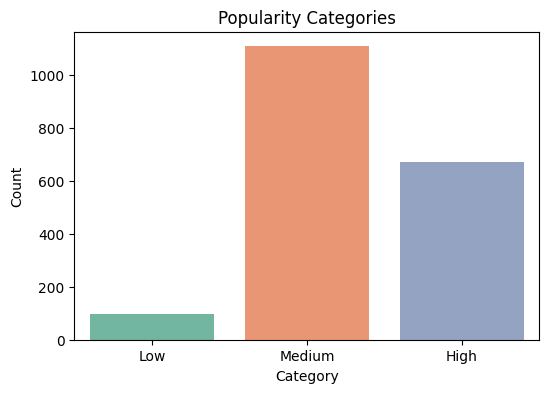

In [145]:
#popularity grouped into bins
popularity_bins = pd.cut(df['popularity'], bins=[0, 40, 70, 100],
                         labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(6,4))
sns.countplot(x=popularity_bins, palette='Set2')
plt.title("Popularity Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

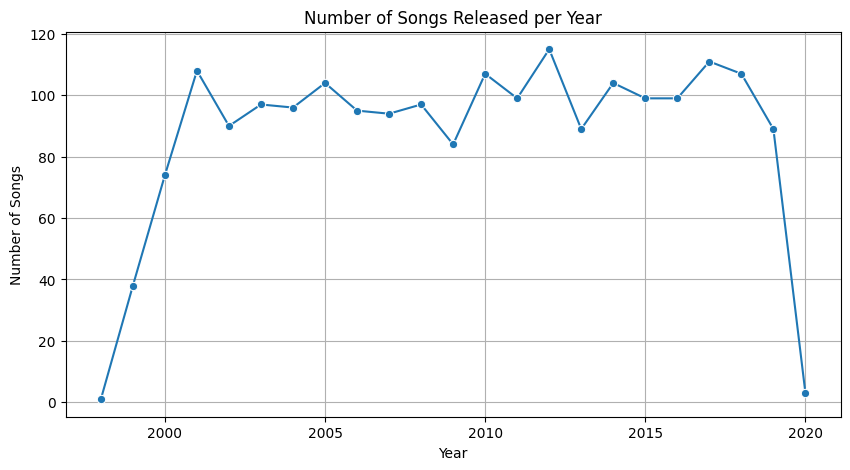

In [146]:
#feature vs feature

#count number of songs per year
songs_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=songs_per_year.index, y=songs_per_year.values, marker="o")
plt.title("Number of Songs Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.grid(True)
plt.show()


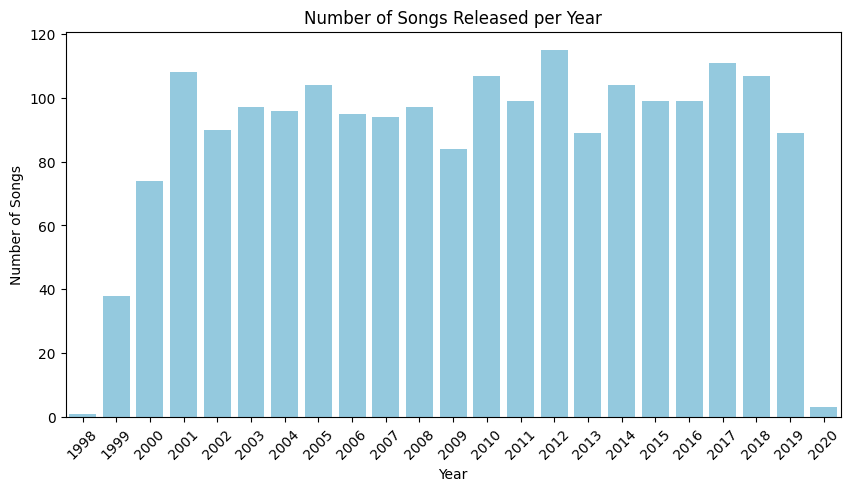

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(x=songs_per_year.index, y=songs_per_year.values, color="skyblue")
plt.title("Number of Songs Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.show()


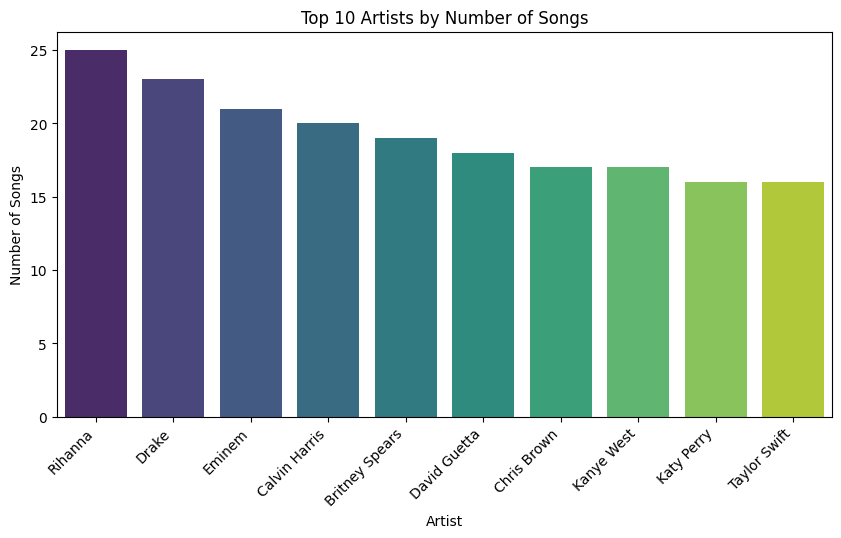

In [148]:
#number of songs per artist
songs_per_artist = df['artist'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=songs_per_artist.head(10).index,
            y=songs_per_artist.head(10).values, palette="viridis")
plt.title("Top 10 Artists by Number of Songs")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45, ha='right')
plt.show()

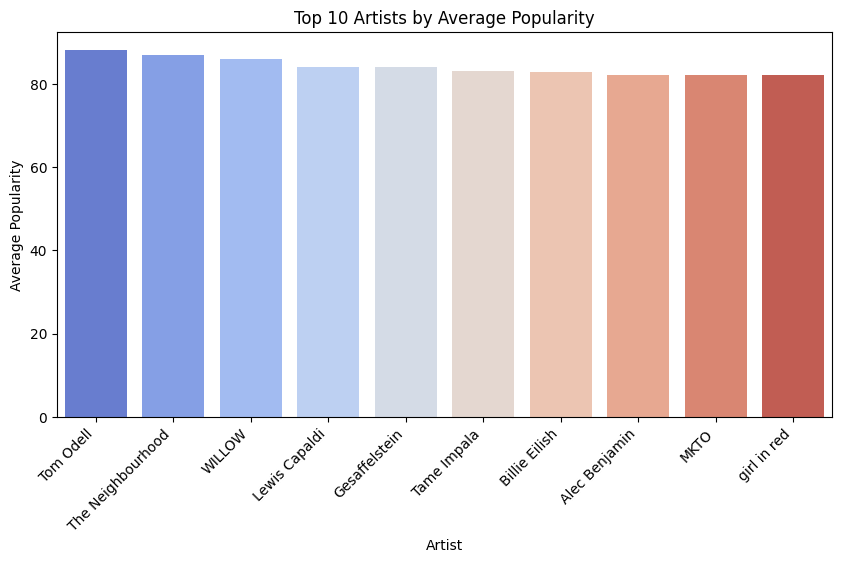

In [149]:
#popularity based on each artist (average popularity)
popularity_per_artist = df.groupby('artist')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=popularity_per_artist.head(10).index,
            y=popularity_per_artist.head(10).values, palette="coolwarm")
plt.title("Top 10 Artists by Average Popularity")
plt.xlabel("Artist")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45, ha='right')
plt.show()

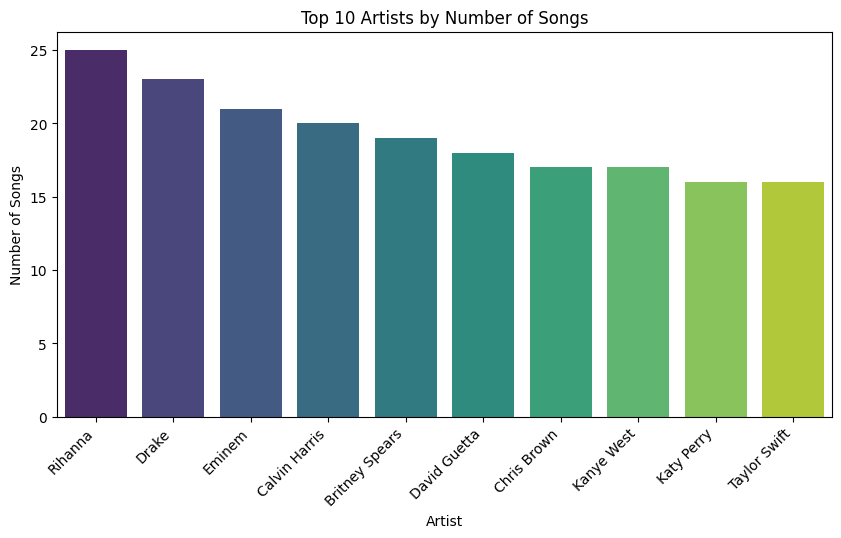

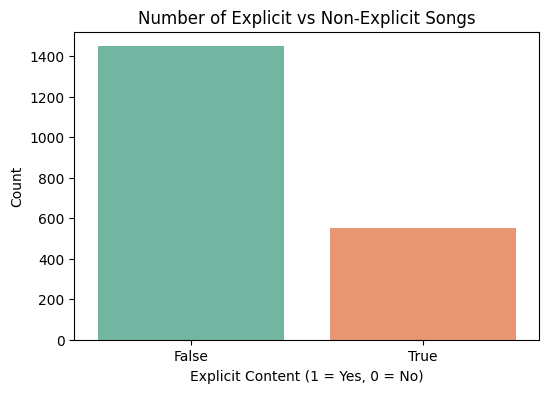

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

#number of songs per artist
plt.figure(figsize=(10,5))
top_artists = df['artist'].value_counts().head(10)  # Top 10 only for readability
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.title("Top 10 Artists by Number of Songs")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45, ha='right')
plt.show()

#explicit vs Non-explicit songs
plt.figure(figsize=(6,4))
sns.countplot(x='explicit', data=df, palette='Set2')
plt.title("Number of Explicit vs Non-Explicit Songs")
plt.xlabel("Explicit Content (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


Correlation Analysis

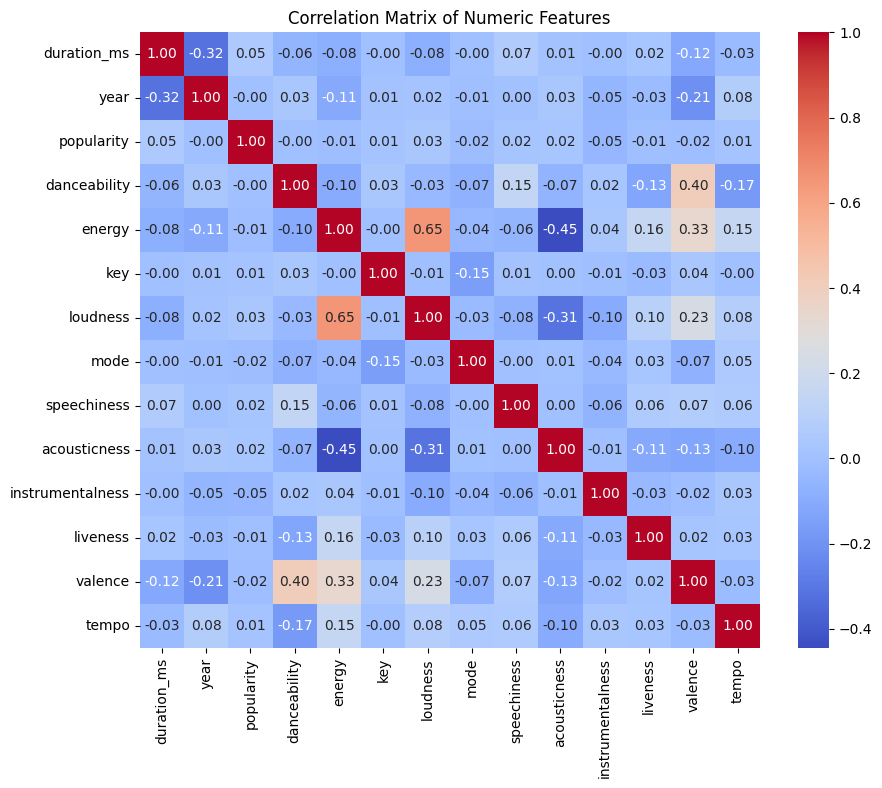

In [151]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

Handling Missing Values

In [152]:
df.isnull().sum()

,0
artist,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0


In [153]:
df.columns = df.columns.str.strip()


Encoding Categorical Features (if any)

In [154]:
import pandas as pd

# Encode 'explicit' (True/False) → 1/0
df['explicit'] = df['explicit'].astype(int)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Step 1: Split genres into lists
df['genre_list'] = df['genre'].str.lower().str.replace(' ', '').str.split(',')

# Step 2: Create a set of all unique genres
all_genres = set(g for sublist in df['genre_list'] for g in sublist)

# Step 3: For each genre, create a binary column
for genre in all_genres:
    df[f'genre_{genre}'] = df['genre_list'].apply(lambda x: int(genre in x))

print(df.head())

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160         0  2000   
1       blink-182    All The Small Things       167066         0  1999   
2      Faith Hill                 Breathe       250546         0  1999   
3        Bon Jovi            It's My Life       224493         0  2000   
4          *NSYNC             Bye Bye Bye       200560         0  2000   

   popularity  danceability  energy  key  loudness  ...  genre_pop  \
0          77         0.751   0.834    1    -5.444  ...          1   
1          79         0.434   0.897    0    -4.918  ...          1   
2          66         0.529   0.496    7    -9.007  ...          1   
3          78         0.551   0.913    0    -4.063  ...          0   
4          65         0.614   0.928    8    -4.806  ...          1   

   genre_world/traditional  genre_classical  genre_r&b  genre_blues  \
0                        0                0          0         

Feature Scaling

In [155]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns (exclude 'popularity' if it's your target)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('popularity')  # keep target unchanged

scaler = StandardScaler()

# Fit scaler on numerical data and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df[num_cols].head())


   duration_ms  explicit      year  danceability    energy       key  \
0    -0.449516 -0.616654 -1.620553      0.595254  0.744130 -1.211348   
1    -1.576468 -0.616654 -1.791245     -1.662882  1.156685 -1.488038   
2     0.557109 -0.616654 -1.791245     -0.986153 -1.469257  0.448791   
3    -0.108752 -0.616654 -1.620553     -0.829437  1.261461 -1.488038   
4    -0.720430 -0.616654 -1.620553     -0.380660  1.359688  0.725481   

   loudness      mode  speechiness  acousticness  ...  genre_pop  \
0  0.035403 -1.113392    -0.622748      0.986974  ...   0.474067   
1  0.307519  0.898156    -0.569697     -0.684669  ...   0.474067   
2 -1.807847  0.898156    -0.775658      0.254151  ...   0.474067   
3  0.749837 -1.113392    -0.592582     -0.592345  ...  -2.109405   
4  0.365460 -1.113392    -0.540572     -0.508676  ...   0.474067   

   genre_world/traditional  genre_classical  genre_r&b  genre_blues  \
0                -0.070888        -0.022366  -0.540361    -0.044766   
1               

Feature Engineering

In [156]:
# 1. Convert duration to minutes
df['duration_min'] = df['duration_ms'] / (1000 * 60)

# 3. Interaction feature: energy multiplied by danceability
df['energy_dance'] = df['energy'] * df['danceability']


Song Popularity Prediction Model Building and Evaluation

1.	Data Splitting

In [157]:
#Data Splitting
X = df.drop(['popularity', 'song', 'artist', 'genre', 'genre_list'], axis=1)
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
X.columns

Index(['duration_ms', 'explicit', 'year', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'genre_hiphop', 'genre_folk/acoustic',
       'genre_latin', 'genre_jazz', 'genre_country', 'genre_pop',
       'genre_world/traditional', 'genre_classical', 'genre_r&b',
       'genre_blues', 'genre_dance/electronic', 'genre_easylistening',
       'genre_set()', 'genre_rock', 'genre_metal', 'duration_min',
       'energy_dance'],
      dtype='object')

In [159]:
X.head()

,duration_ms,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,genre_classical,genre_r&b,genre_blues,genre_dance/electronic,genre_easylistening,genre_set(),genre_rock,genre_metal,duration_min,energy_dance
0,-0.449516,-0.616654,-1.620553,0.595254,0.744130,-1.211348,0.035403,-1.113392,-0.622748,0.986974,...,-0.022366,-0.540361,-0.044766,-0.492175,-0.059265,-0.105463,-0.364009,-0.184733,-0.000007,0.442946
1,-1.576468,-0.616654,-1.791245,-1.662882,1.156685,-1.488038,0.307519,0.898156,-0.569697,-0.684669,...,-0.022366,-0.540361,-0.044766,-0.492175,-0.059265,-0.105463,2.747182,-0.184733,-0.000026,-1.923430
2,0.557109,-0.616654,-1.791245,-0.986153,-1.469257,0.448791,-1.807847,0.898156,-0.775658,0.254151,...,-0.022366,-0.540361,-0.044766,-0.492175,-0.059265,-0.105463,-0.364009,-0.184733,0.000009,1.448913
3,-0.108752,-0.616654,-1.620553,-0.829437,1.261461,-1.488038,0.749837,-1.113392,-0.592582,-0.592345,...,-0.022366,-0.540361,-0.044766,-0.492175,-0.059265,-0.105463,2.747182,5.413227,-0.000002,-1.046303
4,-0.720430,-0.616654,-1.620553,-0.380660,1.359688,0.725481,0.365460,-1.113392,-0.540572,-0.508676,...,-0.022366,-0.540361,-0.044766,-0.492175,-0.059265,-0.105463,-0.364009,-0.184733,-0.000012,-0.517578


Implement Random Forest Regressor

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

#Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [187]:
#random Search Parameters
param_dist = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_rf = RandomizedSearchCV(
    rf, param_dist,
    n_iter=20,      # only 20 random combos
    cv=3,
    n_jobs=-1,
    verbose=2
)
random_search_rf.fit(X_train, y_train)

#best Model & Evaluation
print("Best Parameters:", random_search_rf.best_params_)
best_model_rf = random_search_rf.best_estimator_

y_pred_rf = best_model_rf.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE Score:", mean_absolute_error(y_test, y_pred_rf))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
MSE: 460.59370932353244
RMSE: 21.46144704635576
R² Score: 0.038465387076394464
MAE Score: 14.568624028780441


Gradient Boosting Regressor

In [188]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Gradient Boosting Model
gbr = GradientBoostingRegressor(random_state=42)

# Random search parameters for GB
param_dist_gb = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],  # depth of individual trees
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_gb = RandomizedSearchCV(
    gbr, param_dist_gb,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=2
)
random_search_gb.fit(X_train, y_train)

# Best Model & Evaluation
print("Best Parameters (GB):", random_search_gb.best_params_)
best_model_gb = random_search_gb.best_estimator_

y_pred_gb = best_model_gb.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R² Score:", r2_score(y_test, y_pred_gb))
print("MAE Score:", mean_absolute_error(y_test, y_pred_gb))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters (GB): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.01}
MSE: 462.8091236677257
RMSE: 21.5129989463981
R² Score: 0.033840492009898915
MAE Score: 14.6792838763576


Comparing the models

                          MSE       RMSE        R2
Random Forest      460.593709  21.461447  0.038465
Gradient Boosting  460.593709  21.461447  0.038465


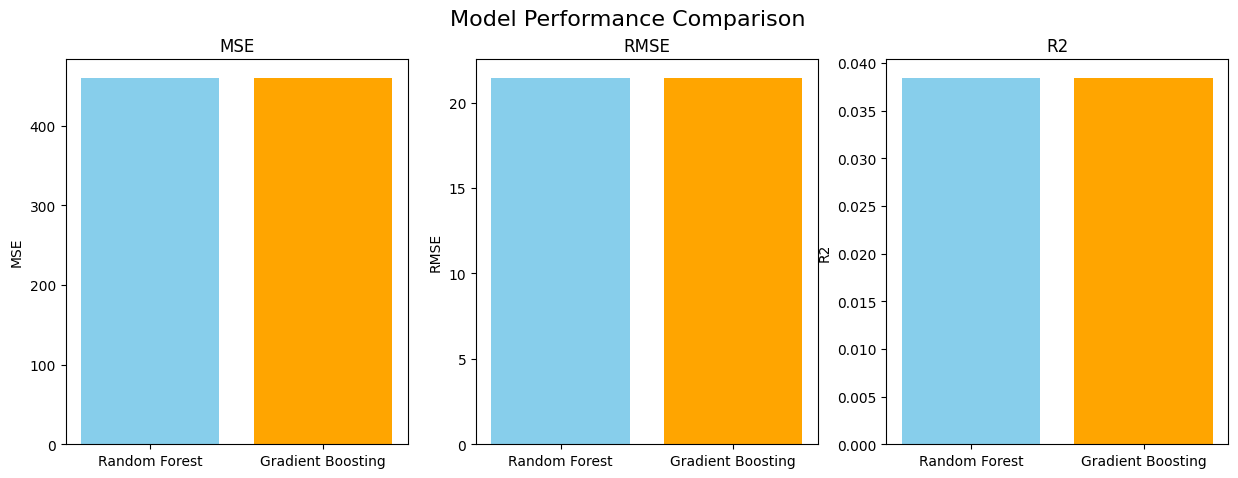

In [186]:
# Dictionary to store results
results = {}

#Random Forest
rf_best = random_search_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)
results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'R2': r2_score(y_test, y_pred_rf)
}

#Gradient Boosting
gbr_best = random_search_gb.best_estimator_
y_pred_gbr = gbr_best.predict(X_test)
results['Gradient Boosting'] = {
    'MSE': mean_squared_error(y_test, y_pred_gbr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gbr)),
    'R2': r2_score(y_test, y_pred_gbr)
}

#Convert to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

#Plot Compariso
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['MSE', 'RMSE', 'R2']
for i, metric in enumerate(metrics):
    axes[i].bar(results_df.index, results_df[metric], color=['skyblue', 'orange'])
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)

plt.suptitle("Model Performance Comparison", fontsize=16)
plt.show()
